# Lecture 9


Some of the examples today are inspired by [Python Practice Book](https://anandology.com/python-practice-book/object_oriented_programming.html).



## Rational Numbers

Lets write a class that keeps fractions as fractions when doing computations:

In [13]:
class RationalNumber:
    """
    Rational Numbers with support for arthmetic operations.

        >>> a = RationalNumber(1, 2)
        >>> b = RationalNumber(1, 3)
        >>> a + b
        5/6
        >>> a - b
        1/6
        >>> a * b
        1/6
        >>> a/b
        3/2
    """
    def __init__(self, numerator, denominator=1):
        self.n = numerator
        self.d = denominator

    def __add__(self, other):
        if not isinstance(other, RationalNumber):
            other = RationalNumber(other)

        n = self.n * other.d + self.d * other.n
        d = self.d * other.d
        return RationalNumber(n, d)

    def __sub__(self, other):
        if not isinstance(other, RationalNumber):
            other = RationalNumber(other)

        n1, d1 = self.n, self.d
        n2, d2 = other.n, other.d
        return RationalNumber(n1*d2 - n2*d1, d1*d2)

    def __mul__(self, other):
        if not isinstance(other, RationalNumber):
            other = RationalNumber(other)

        n1, d1 = self.n, self.d
        n2, d2 = other.n, other.d
        return RationalNumber(n1*n2, d1*d2)

    def __truediv__(self, other):
        if not isinstance(other, RationalNumber):
            other = RationalNumber(other)

        n1, d1 = self.n, self.d
        n2, d2 = other.n, other.d
        return RationalNumber(n1*d2, d1*n2)

    def __str__(self):
        return "%s/%s" % (self.n, self.d)

    __repr__ = __str__

In [14]:
RationalNumber(1,2)

1/2

In [15]:
print(RationalNumber(1,2) + RationalNumber(1,2))
print(RationalNumber(1,2) - RationalNumber(1,2))
print(RationalNumber(1,2) * RationalNumber(1,2))
print(RationalNumber(1,2) / RationalNumber(1,2))

4/4
0/4
1/4
2/2


# Particle Physics Example

Let's try to do something more meaningful and introduce some particle physics basics. Imagine you 
are thinking about building an experiment to study the Higgs boson. You have an accelerator that will produce this Higgs by colliding other particles together at high energies. The Higgs boson decays very quickly, so you won't see it directly. Instead, you'll only be able to observe the particles that the Higgs decays into. You'll need to design and build a detector that can see these decay products. Before you get started, you want to know what are the energies of the particles, so you can design a detector that performs well for Higgs studies. Lets build a simulation to extract an estimate of these energies.

## Relativistic Mechanics

Since everything will be moving close to the speed of light, we'll need to employ relativistic mechanics
to write down the equations behind our simulation. In relativistic mechanics, the Energy and Momentum of particles are different in every frame, but obey $m^2=E^2-\vec{p}^2$ or $E^2=\vec{p}^2$ for massless particles, where we set the speed of light $c=1$. It is therefore convenient to express the Energy and Momentum of a particle as a 4-vector, for example in Euclidean coordiates: $p= (E,p_{x},p_{y},p_{z}) = (E,\vec{p})$.

Energy and momentum are conserved when a particle decays into two other particles, for example a $Z$ boson to two electrons, $Z\rightarrow e^+ e^-$, or a Higgs Boson to two photons, $H\rightarrow \gamma\gamma$. In 4-vectors we can express conservations, for example in the Higgs decay, as $p_H = p_{\gamma1}+p_{\gamma2}$. In a two body decay, it's easy to fully solve for the momenta daughter particles in the rest frame of the parent:

$$
m_H = 125 GeV\\
p_H = (m_{H},0,0,0)
$$

Momentum conservation tells us that $\vec{p_{H}} = 0 = \vec{p_{\gamma1}} + \vec{p_{\gamma2}} \Rightarrow \vec{p_{\gamma1}} = - \vec{p_{\gamma2}} = p_\gamma$, i.e. the daughters travel in opposite directions. The 4-vector of the photons are

$$
E_H = m_H = E_{\gamma1}+E_{\gamma2} = |\vec{p_{\gamma1}}| + |\vec{p_{\gamma2}}|=2|p_\gamma|\\
\Rightarrow p_{\gamma1}= (m_H/2, \vec{p_{\gamma}})\\
\Rightarrow p_{\gamma2}= (m_H/2, -\vec{p_{\gamma}})
$$

If we select that direction to be aligned with one of our axes ($z$ in this case), then we can write:
$$
p_{\gamma1}= (m_H/2, 0,0, m_H/2)\\
p_{\gamma2}= (m_H/2, 0,0, -m_H/2).
$$

We can compute these 4-vectors in the case that the parent particle is not at rest by relavistic boosting. Boosting a 4-vector refers to computation necessary to take a vector in a frame of reference and compute the components of that vector in another (boosted) frame of reference.

We have the formulae... now lets numerically compute what vectors in a $H\rightarrow \gamma \gamma$ will be. 

We will begin by representing 4-vectors as python lists. For example the first photon in the rest frame can be written as:

In [16]:
m_H= 125.
p_g1= [m_H/2,0,0,m_H/2]
print(p_g1)

[62.5, 0, 0, 62.5]


To get the second photon, lets write a function that negates 4-vectors:

In [17]:
def neg_4v(p):
    return [p[0], -p[1],  -p[2] , -p[3]]

p_g2=neg_4v(p_g1)
print(p_g2)

[62.5, 0, 0, -62.5]


Other useful functions:

In [18]:
def add_v4(p1,p2):
    return [p1[0]+p2[0], p1[1]+p2[1],  p1[2]+p2[2] , p1[3]+p2[3]]

def sub_v4(p1,p2):
    return add_v4(p1,neg_4v(p2))

print ("Sum:", add_v4(p_g1,p_g2))
print ("Difference:", sub_v4(p_g1,p_g2))

Sum: [125.0, 0, 0, 0.0]
Difference: [125.0, 0, 0, 125.0]


We will need to also take the dot product of vectors and compute the mass of vectors:

In [19]:
import math

def dot_v4(p1,p2):
    return math.sqrt(sum([p1[0]*p2[0], -p1[1]*p2[1],  -p1[2]*p2[2] , -p1[3]*p2[3]]))

def mass_v4(p):
    return dot_v4(p,p)

# Quick test:
print ("Dot:", dot_v4(p_g1,p_g2))
print ("Gamma Mass:", mass_v4(p_g1))

Dot: 88.38834764831844
Gamma Mass: 0.0


Now lets take the 2 photon 4-vectors and check that we can get the Higgs 4-vector by adding:

In [20]:
print ("Higgs Mass:", mass_v4(add_v4(p_g1,p_g2)))

Higgs Mass: 125.0


There are lots of ways to write the same thing, for example:

In [21]:
def add_v4_1(p1,p2):
    out=list()
    for i in range(4):
        out.append(p1[i]+p2[i])
    return out

def add_v4_2(p1,p2):
    return map(lambda x: x[0]+x[1],zip(p1,p2))

def add_v4_3(p1,p2):
    return [sum(x) for x in zip(p1,p2)]

print ("zip:", list(zip(p_g1,p_g2)))
print ("Sum:", add_v4_3(p_g1,p_g2))

zip: [(62.5, 62.5), (0, 0), (0, 0), (62.5, -62.5)]
Sum: [125.0, 0, 0, 0.0]


Next lets implement boosting... If you take Modern Physics (PHYS 3313) Special Relativity will be the first part of the course and you will learn boosting formulae. We don't have to go into the details here. The process of boosting involves computing the appropriate boost matrix and performing a matrix-vector multiplication:

In [22]:
def boost_matrix(beta_in):
    Lambda= [[0,0,0,0],
             [0,0,0,0],
             [0,0,0,0],
             [0,0,0,0]]
    
    beta=[0]+beta_in

    beta2=sum(x**2 for x in beta)
    gamma=1./math.sqrt(1.-beta2)
    
    for i in range(4):
        for j in range(4):
            if j==0:
                Lambda[i][0]=-gamma*beta[i]
            elif i==0:
                Lambda[0][j]=-gamma*beta[j]
            else:
                Lambda[i][j]= (gamma-1)*beta[i]*beta[j]/beta2 + float(i==j)

    Lambda[0][0]=gamma

    return Lambda
                
def boost(p,beta):
    Lambda=boost_matrix(beta)
    out=4*[0.]
    
    # Lorentz contraction
    for j in range(4):
        out[j]=sum(map(lambda x: x[0]*x[1],zip(p,Lambda[j])))
    return out

So now we can implement a 2-body decay, where given the 4-vector of any particle, we can compute the 4-vectors of 2 daughter particles if it decays.

Steps are:
* Compute the decay in rest frame of the parent particle where things are easy.
    * Get the mass of the parent particles.
    * Write down the 4-vectors of the daughters based on forumlae above.
* Compute the $\beta$ (velocity of the original parent particle divided by speed of light).
* Use $\beta$ to boost the lab daughter 4-vectors to the frame of the moving parent particle.

In [23]:
def decay(p):
    m=mass_v4(p)
    p1=[m/2.,0.,0.,m/2.]
    p2=[m/2.,0.,0.,-m/2.]
    # We should now rotate by 2 arbitrary angles...
    beta=[p[1]/p[0],p[2]/p[0],p[3]/p[0]]
    
    p1b=boost(p1,beta)
    p2b=boost(p2,beta)

    return p1b,p2b

Now lets put it all together:

In [24]:
# Start with a Higgs at rest
p_H=[m_H,0.,0.,0.]

# Now boost it (along y for example)
p_Hb=boost(p_H,[0.,.5,0.])
print ("Boosted Higgs:", p_Hb)
print ("Mass of Boosted Higgs:", mass_v4(p_Hb))

# Decay the boosted Higgs
p1,p2=decay(p_Hb)

print("p1:",p1)
print("p2:",p2)

# Make sure the decay products add back to the Higgs
print ("Higgs from daughters:", add_v4(p1,p2))
print ("Higgs mass from daughters:", mass_v4(add_v4(p1,p2)))

Boosted Higgs: [144.33756729740645, 0.0, -72.16878364870323, 0.0]
Mass of Boosted Higgs: 125.00000000000001
p1: [72.16878364870324, 0.0, 36.08439182435162, 62.50000000000001]
p2: [72.16878364870324, 0.0, 36.08439182435162, -62.50000000000001]
Higgs from daughters: [144.33756729740648, 0.0, 72.16878364870324, 0.0]
Higgs mass from daughters: 125.00000000000003


### Object Oriented Programming

Lets write a 4-vector class to do the same thing:

In [25]:
class four_vector(object):
    def __init__(self, p=None):
        if p:
            self.v=p
        else:
            self.v=[0.,0.,0.,0.]

    def setval(self,l):
        self.v=l
            
    def __add__(self,other):
        return four_vector([sum(x) for x in zip(self.v,other)])
    
    def neg(self,p):
        return four_vector([p[0], -p[1],  -p[2] , -p[3]])

    def __sub__(self,other):
        return self.__add__(self.v,self.neg(other))
  
    def __mul__(self,other):
        return math.sqrt(sum([self.v[0]*other[0], 
                              -self.v[1]*other[1],
                              -self.v[2]*other[2],
                              -self.v[3]*other[3]]))

    def boost(self,beta):
        Lambda=boost_matrix(beta)
        out=4*[0.]
        for j in range(4):
            out[j]=sum(map(lambda x: x[0]*x[1],zip(self.v,Lambda[j])))
        return four_vector(out)

    def mass(self):
        return self.__mul__(self.v)

    def __getitem__(self,i):
        return self.v[i]

    
    def __str__(self):
        return "({0}, {1}, {2}, {3})".format(self.v[0],self.v[1],self.v[2],self.v[3])
      

In [26]:
x=four_vector()
print(x)

(0.0, 0.0, 0.0, 0.0)


In [27]:
y=four_vector([1,2,3,4])
print(y)

(1, 2, 3, 4)


In [28]:
def decay(p):
    m=p.mass()
    p1=four_vector([m/2.,0.,0.,m/2.])
    p2=four_vector([m/2.,0.,0.,-m/2.])
    # We should now rotate by 2 arbitrary angles...
    beta=[p[1]/p[0],p[2]/p[0],p[3]/p[0]]
    
    p1b=p1.boost(beta)
    p2b=p2.boost(beta)

    return p1b,p2b

In [29]:
# Start with a Higgs at rest
p_H=four_vector([m_H,0.,0.,0.])
print ("Initial Higgs:", p_H)

# Now boost it (along y for example)
p_Hb=p_H.boost([0.,.5,0.])
print ("Boosted Higgs:", p_Hb)
print ("Mass of Boosted Higgs:", p_Hb.mass())

# Decay the boosted Higgs
p1,p2=decay(p_Hb)

# Make sure the decay products add back to the Higgs
print ("Higgs from daughters:", p1+p2)
print ("Higgs mass from daughters:", (p1+p2).mass())

Initial Higgs: (125.0, 0.0, 0.0, 0.0)
Boosted Higgs: (144.33756729740645, 0.0, -72.16878364870323, 0.0)
Mass of Boosted Higgs: 125.00000000000001
Higgs from daughters: (144.33756729740648, 0.0, 72.16878364870324, 0.0)
Higgs mass from daughters: 125.00000000000003


Usually in an experiment, you see the decay particles (in this case 2 photons) and infer the presence of the parent particle by adding their 4 vectors and seeing that the mass is consistent with the mass of the hypothetical parent particle. 

We can take an extra step and create a new class to represent the parent particle composed of daughter particles:

In [30]:
class composite(four_vector):
    def __init__(self,daughters):
        super(composite, self).__init__()
        self.daughters=daughters

        tmp=four_vector()
        for d in self.daughters:
            tmp=tmp+d
          
        self.setval(tmp.v)

In [31]:
H_reco=composite([p1,p2])
print ("Composite Higgs:", H_reco)
print ("Mass:", H_reco.mass())

Composite Higgs: (144.33756729740648, 0.0, 72.16878364870324, 0.0)
Mass: 125.00000000000003


### Generating Events

Simulation is a key part of developing particle physics experiments and understanding output. For example, if you want to build an experiment to study the Higgs, you'll have to think about what would the photons coming from the Higgs decay looks like. Since every Higgs created will have different speed and direction, the photon energy and direction angles will all be distributions. In order to get a sense of what those distributions look like we can simulate the process by "generating" hypothetical Higgses, decaying them, and looking at the resulting photon.

#### Generating a Normal Distribution: Box-Muller transform

The Box-Muller transform generates 2 random variables $Z_0$ and $Z_1$ that are Normal distributed from two uniformly distributed random variables $U_1$ and $U_2$ using the relation:

$$
Z_0 = \sqrt{-2 \log{U_1}}\cos{(2\pi U_2)} \\ 
Z_1 = \sqrt{-2 \log{U_1}}\sin{(2\pi U_2)}
$$

In [32]:
import math
import random

def generate_normal(N,m=0,s=1):
    out = list() 
    
    while len(out)<N:
        U1=random.random()
        U2=random.random()
    
        out.append(s*math.sqrt(-2*math.log(U1))*math.cos(2*math.pi*U2)+m)
        out.append(s*math.sqrt(-2*math.log(U1))*math.sin(2*math.pi*U2)+m)

    return out[:N]

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

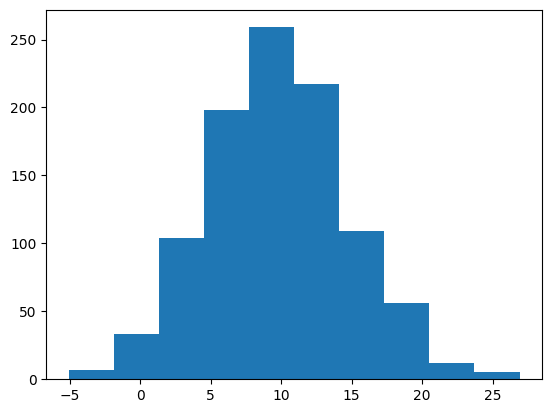

In [34]:
_=plt.hist(generate_normal(1000,10,5))

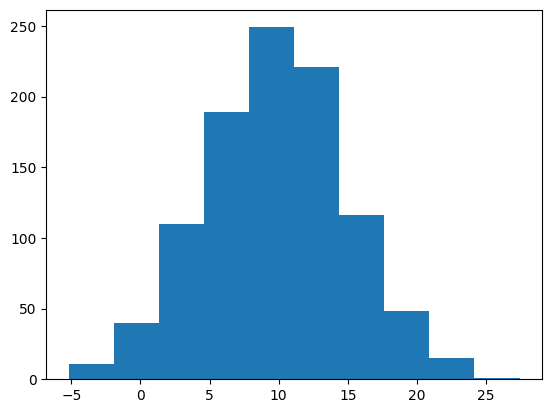

In [35]:
# Same thing with numpy (for reference)
import numpy as np
_=plt.hist(np.random.normal(loc=10., scale=5.0, size=1000))

Back to generating events...

Here's what we will do:
1. Simulate a Higgs decay in the rest frame... 

1. We need to create a candidate Higgs particle with energy drawn from a appropriate distribution. In this case, we will assume that the Higgs mostly start with speed of $(0.5 \pm 0.2) c$  (where $c$ is speed of light... we set c=1 here). So we'll use a normal distribution.

1. Use the Higgs energy to boost the decay to lab frame.

1. Decay the boosted Higgs to get the daughter particle momenta.

1. Store the information.

After doing this many times, we can look at the daughter particle energy distribution.


In [36]:
Events=[]

N_Events=100

for i in range(1,N_Events):
    p_H=four_vector([m_H,0.,0.,0.])
    my_boost= generate_normal(1,.5,.2)[0]
    if my_boost>=1.:
        my_boost=.9
    #print(my_boost)
    p_Hb=p_H.boost([0.,my_boost,0.])
    
    p1,p2=decay(p_Hb)
    
    Event= {"Higgs":composite([p1,p2]),
            "Boost":my_boost}
    
    Events.append(Event)
    
# Make sure the decay products add back to the Higgs
for i,Event in enumerate(Events):
    print ("Event:",i)
    print ("Higgs 4-vector:",Event["Higgs"])
    print ("Boost:",Event["Boost"])


Event: 0
Higgs 4-vector: (326.42025478720734, 0.0, 301.5380286719162, 0.0)
Boost: 0.923772419908465
Event: 1
Higgs 4-vector: (138.14554460588863, 0.0, 58.814891774597136, 0.0)
Boost: 0.425745846110263
Event: 2
Higgs 4-vector: (140.62257976909524, 0.0, 64.41824229917758, 0.0)
Boost: 0.45809316259844945
Event: 3
Higgs 4-vector: (163.81157336487047, 0.0, 105.87365851936138, 0.0)
Boost: 0.6463136660285937
Event: 4
Higgs 4-vector: (147.92864845937032, 0.0, 79.10679512542501, 0.0)
Boost: 0.5347631844764151
Event: 5
Higgs 4-vector: (130.26204527688603, 0.0, 36.64969903993084, 0.0)
Boost: 0.2813536280812109
Event: 6
Higgs 4-vector: (130.80782994576916, 0.0, 38.54462835624777, 0.0)
Boost: 0.29466606373813986
Event: 7
Higgs 4-vector: (132.74131700602703, 0.0, 44.66830241339557, 0.0)
Boost: 0.33650639771313584
Event: 8
Higgs 4-vector: (133.90532480930332, 0.0, 48.01703877047198, 0.0)
Boost: 0.3585894648988291
Event: 9
Higgs 4-vector: (148.5240226653212, 0.0, 80.21462029261785, 0.0)
Boost: 0.54007

In [37]:
len(Events)

99

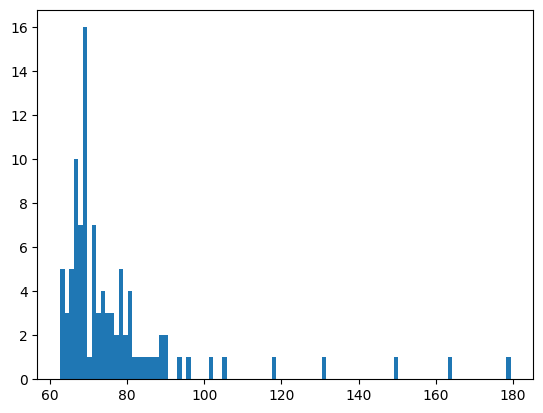

In [38]:
_=plt.hist([an_event["Higgs"].daughters[0].v[0] for an_event in Events],bins=100)

## Drawing Program Example

Next work through how a drawing program would work. We will separate the problem into two parts:

1. A canvas that holds pixel values, which we can set as needed, and can display itself.
1. Shape objects that hold information about specific shapes (like circle or rectangle), and know how to set pixels on a canvas to display themselves.

### Canvas

In order to keep things simple, we'll do everything with text graphics. Our canvas is going to be just a grid of characters. Here is the implementation:

In [39]:
class Canvas:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        # Empty canvas is a matrix with element being the "space" character
        self.data = [[' '] * width for i in range(height)]

    def set_pixel(self, row, col, char='*'):
        self.data[row][col] = char

    def get_pixel(self, row, col):
        return self.data[row][col]
    
    def clear_canvas(self):
        self.data = [[' '] * self.width for i in range(self.height)]
    
    def v_line(self, x, y, w, **kargs):
        for i in range(x,x+w):
            self.set_pixel(i,y, **kargs)

    def h_line(self, x, y, h, **kargs):
        for i in range(y,y+h):
            self.set_pixel(x,i, **kargs)
            
    def line(self, x1, y1, x2, y2, **kargs):
        slope = (y2-y1) / (x2-x1)
        for y in range(y1,y2):
            x= int(slope * y)
            self.set_pixel(x,y, **kargs)
            
    def display(self):
        print("\n".join(["".join(row) for row in self.data]))

A couple of quick tests:

In [40]:
my_canvas = Canvas(10,10)
my_canvas.set_pixel(0,0,char='A')
my_canvas.v_line(1,1,4,char='|')
my_canvas.h_line(1,1,3,char='-')
my_canvas.line(3,3,7,6,char='\\')

my_canvas.display()

A         
 ---      
 | \      
 |  \\    
 |        
          
          
          
          
          


In [41]:
c1=Canvas(40,40)
c1.v_line(1,1,5,char='|')
c1.h_line(3,3,4)
c1.line(4,4,30,20)
c1.display()

                                        
 |                                      
 |  *                                   
 | ****                                 
 |     **                               
 |       *                              
          **                            
            *                           
             **                         
               **                       
                 *                      
                  **                    
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                

Here is the data that the canvas stores:

In [42]:
c1.data

[[' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' '],
 [' ',
  '|',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' '],
 [' ',
  '|',
  ' ',
  ' ',
  '*',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' '],
 [' ',
  '|',
  ' ',
  '*',
  '*',
  '*',
  '*',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  '

In [43]:
c1.display()

                                        
 |                                      
 |  *                                   
 | ****                                 
 |     **                               
 |       *                              
          **                            
            *                           
             **                         
               **                       
                 *                      
                  **                    
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                

### Shapes

For shapes, we will define a base class which all shapes inherit from:

In [45]:
class Shape:
    def __init__(self, name="", **kwargs):
        self.name=name
        self.kwargs=kwargs
    
    def paint(self, canvas): pass

class Rectangle(Shape):
    def __init__(self, x, y, w, h, **kwargs):
        Shape.__init__(self, **kwargs)
        self.x = x
        self.y = y
        self.w = w
        self.h = h

    def paint(self, canvas):
        canvas.v_line(self.x, self.y, self.w, **self.kwargs)
        canvas.v_line(self.x, self.y + self.h, self.w, **self.kwargs)
        canvas.h_line(self.x, self.y, self.h, **self.kwargs)
        canvas.h_line(self.x + self.w, self.y, self.h, **self.kwargs)

class Square(Rectangle):
    def __init__(self, x, y, size, **kwargs):
        Rectangle.__init__(self, x, y, size, size, **kwargs)

class Line(Shape):
    def __init__(self, x1, y1, x2, y2,  **kwargs):
        Shape.__init__(self, **kwargs)
        self.x1=x1
        self.y1=y1
        self.x2=x2
        self.y2=y2
        
    def paint(self, canvas):
        canvas.line(self.x1,self.y1,self.x2,self.y2)
        
class CompoundShape(Shape):
    def __init__(self, shapes):
        self.shapes = shapes

    def paint(self, canvas):
        for s in self.shapes:
            s.paint(canvas)

Quick test:

In [46]:
c1=Canvas(50,40)
s1=Rectangle(5,5,10,5,char="^")
s1.paint(c1)
c1.display()
# l1=Line(2,2,13,19)
# l1.paint(c1)

                                                  
                                                  
                                                  
                                                  
                                                  
     ^^^^^^                                       
     ^    ^                                       
     ^    ^                                       
     ^    ^                                       
     ^    ^                                       
     ^    ^                                       
     ^    ^                                       
     ^    ^                                       
     ^    ^                                       
     ^    ^                                       
     ^^^^^                                        
                                                  
                                                  
                                                  
                               

In [47]:
c1=Canvas(50,40)
s1=Square(5,5,20,char="^")
s1.paint(c1)
l1=Line(2,2,13,19)
l1.paint(c1)

In [48]:
c1.display()

                                                  
                                                  
                                                  
  *                                               
   *                                              
     ^^^^^^^^^^^^^^^^^^^^^                        
    *^                   ^                        
     *                   ^                        
     ^                   ^                        
     ^*                  ^                        
     ^ *                 ^                        
     ^                   ^                        
     ^  *                ^                        
     ^   *               ^                        
     ^                   ^                        
     ^    *              ^                        
     ^                   ^                        
     ^     *             ^                        
     ^      *            ^                        
     ^                   ^     

Lets test compound shape:

In [49]:
c1=Canvas(50,40)
s1=CompoundShape([Square(5,5,20,char="^"),
                  Line(2,2,13,19)])
s1.paint(c1)

In [50]:
c1.display()

                                                  
                                                  
                                                  
  *                                               
   *                                              
     ^^^^^^^^^^^^^^^^^^^^^                        
    *^                   ^                        
     *                   ^                        
     ^                   ^                        
     ^*                  ^                        
     ^ *                 ^                        
     ^                   ^                        
     ^  *                ^                        
     ^   *               ^                        
     ^                   ^                        
     ^    *              ^                        
     ^                   ^                        
     ^     *             ^                        
     ^      *            ^                        
     ^                   ^     

Note that we are using polymorphism to treat specific objects line square and line as shapes:

In [51]:
shapes = list()

shapes.append(Square(5,5,20,char="^"))
shapes.append(Line(2,2,13,19))

c1=Canvas(50,40)
for shape in shapes:
    shape.paint(c1)
c1.display()

                                                  
                                                  
                                                  
  *                                               
   *                                              
     ^^^^^^^^^^^^^^^^^^^^^                        
    *^                   ^                        
     *                   ^                        
     ^                   ^                        
     ^*                  ^                        
     ^ *                 ^                        
     ^                   ^                        
     ^  *                ^                        
     ^   *               ^                        
     ^                   ^                        
     ^    *              ^                        
     ^                   ^                        
     ^     *             ^                        
     ^      *            ^                        
     ^                   ^     

### Drawing

What if we wanted to create a drawing consisting of multiple shapes, view it, and then change the drawing, like make an object larger? All we have to do is to keep track of (book keep) all the objects in the drawing, have a means of finding the object that we want to change, change the object, and then redraw on a canvas.

Lets introduce a `RasterDrawing` class that would facilitate with these steps:

In [52]:
class RasterDrawing:
    def __init__(self):
        self.shapes=dict()
        self.shape_names=list()
        
    def add_shape(self,shape):
        if shape.name == "":
            shape.name = self.assign_name()
        
        self.shapes[shape.name]=shape
        self.shape_names.append(shape.name)

    def update(self, canvas):
        canvas.clear_canvas()
        self.paint(canvas)
        
    def paint(self,canvas):
        for shape_name in self.shape_names:
            self.shapes[shape_name].paint(canvas)
            
    def assign_name(self):
        name_base="shape"
        name = name_base+"_0"
        
        i=1
        while name in self.shapes:
            name = name_base+"_"+str(i)
            
        return name

Quick tests:

In [53]:
c1=Canvas(50,40)
rd=RasterDrawing()

rd.add_shape(Square(5,5,20,char="^"))
print(rd.shapes)
rd.add_shape(Line(2,2,13,19))
print(rd.shapes)
rd.paint(c1)

c1.display()

{'shape_0': <__main__.Square object at 0x7f9de94ca800>}
{'shape_0': <__main__.Square object at 0x7f9de94ca800>, 'shape_1': <__main__.Line object at 0x7f9de94c80d0>}
                                                  
                                                  
                                                  
  *                                               
   *                                              
     ^^^^^^^^^^^^^^^^^^^^^                        
    *^                   ^                        
     *                   ^                        
     ^                   ^                        
     ^*                  ^                        
     ^ *                 ^                        
     ^                   ^                        
     ^  *                ^                        
     ^   *               ^                        
     ^                   ^                        
     ^    *              ^                        
     ^             

Looks like it works. Note that we can use the same raster drawing to draw on different a canvas:

In [54]:
c1=Canvas(40,40)
rd.paint(c1)
c1.display()

                                        
                                        
                                        
  *                                     
   *                                    
     ^^^^^^^^^^^^^^^^^^^^^              
    *^                   ^              
     *                   ^              
     ^                   ^              
     ^*                  ^              
     ^ *                 ^              
     ^                   ^              
     ^  *                ^              
     ^   *               ^              
     ^                   ^              
     ^    *              ^              
     ^                   ^              
     ^     *             ^              
     ^      *            ^              
     ^                   ^              
     ^       *           ^              
     ^        *          ^              
     ^                   ^              
     ^         *         ^              
     ^          

Now lets see if we can change an object and see how it affects the drawing:

In [56]:
rd.shapes["shape_0"].w=1
c1.update()

                                        
                                        
                                        
  *                                     
   *                                    
     ^^^^^^^^^^^^^^^^^^^^^              
    *^                   ^              
     *                   ^              
     ^                   ^              
     ^*                  ^              
     ^ *                 ^              
     ^                   ^              
     ^  *                ^              
     ^   *               ^              
     ^                   ^              
     ^    *              ^              
     ^                   ^              
     ^     *             ^              
     ^      *            ^              
     ^                   ^              
     ^       *           ^              
     ^        *          ^              
     ^                   ^              
     ^         *         ^              
     ^          

Why didn't this work? Because we didn't redraw on the canvas, so we are just seeing what we drew before. Try again:

In [49]:
c2=Canvas(40,40)
rd.paint(c2)
c2.display()

                                        
                                        
                                        
  *                                     
   *                                    
     ^^^^^^^^^^^^^^^^^^^^^              
    *^^^^^^^^^^^^^^^^^^^^               
     *                                  
                                        
      *                                 
       *                                
                                        
        *                               
         *                              
                                        
          *                             
                                        
           *                            
            *                           
                                        
             *                          
              *                         
                                        
               *                        
                

Bad pipe message: %s [b'\xac\x80\x0fc\xd3\xaeL\x1a\xddr\x08\x0f\x9cm\x9d\xac\x81"\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D\x00E\x00F\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\x96\x00\x97\x00\x98\x00\x99\x00\x9a\x00\x9b\x00\x9c\x00\x9d\x00\x9e\x00\x9f']
Bad pipe message: %s [b'\x86\xc0\xf4\x8c\xbe\xe8.\xf5\x85;O0\t\x91\xf5\x90\x9dP\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B

Now we see the drawing has changed.